# Import

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Funkce

In [3]:
def find_strings_on_page(url, target_strings, x = True):
    driver = webdriver.Chrome()
    driver.get(url)
    page_number = 1  # Počáteční stránka

    with open('seznam.txt', 'w') as file:
        while x == True:

            # Počkejte na načtení obsahu stránky
            driver.implicitly_wait(5)

            # Získat zdrojový kód stránky po interakci
            page_source = driver.page_source

            soup = BeautifulSoup(page_source, 'html.parser')

            for target_string in target_strings:
                if target_string in soup.get_text():
                    file.write(f'{target_string} nalezen na stránce https://www.jobs.cz/prace/programator/?page={page_number} \n')

            page_number += 1
            driver.get(f'https://www.jobs.cz/prace/programator/?page={page_number}')
            
            page_source = driver.page_source
            soup = BeautifulSoup(page_source, 'html.parser')
            if 'Zadaná stránka už není dostupná.' in soup.get_text():
                x = False

    driver.quit()

def priprav_data():
    pripravny_seznam = []
    with open('seznam.txt', 'r') as file:
        for line in file:
            slovo = line.split()
            if slovo:
                pripravny_seznam.append(slovo[0])
                
    for i, slovo in enumerate(pripravny_seznam):
        if slovo == "C++" or slovo == "C+":
            pripravny_seznam[i] = "C"
        elif slovo == ".NET":
            pripravny_seznam[i] = "C#"
        elif slovo == "JavaScript" or slovo == "Java/":
            pripravny_seznam[i] = "Java"
    
    jazyky = {
        "Java"  : pripravny_seznam.count("Java"),
        "C#"    : pripravny_seznam.count("C#"),
        "C"     : pripravny_seznam.count("C"),
        "SQL"   : pripravny_seznam.count("SQL"),
        "PHP"   : pripravny_seznam.count("PHP"),
        "Python": pripravny_seznam.count("Python")
    }
    
    return jazyky


def vykresli_graf(data):
    serazene_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

    jazyky = list(serazene_data.keys())
    hodnoty = list(serazene_data.values())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    ax1.bar(jazyky, hodnoty, color=['blue', 'green', 'red', 'purple', 'orange', 'yellow'])
    ax1.set_xlabel('Programovací jazyk')
    ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

    ax2.pie(hodnoty, labels=jazyky, autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'red', 'purple', 'orange', 'yellow'])
    plt.suptitle('Analýza programovacích jazyků na stránce jobs.cz', fontsize=16)
    plt.savefig('graf.png')


    plt.show()

# Výstup

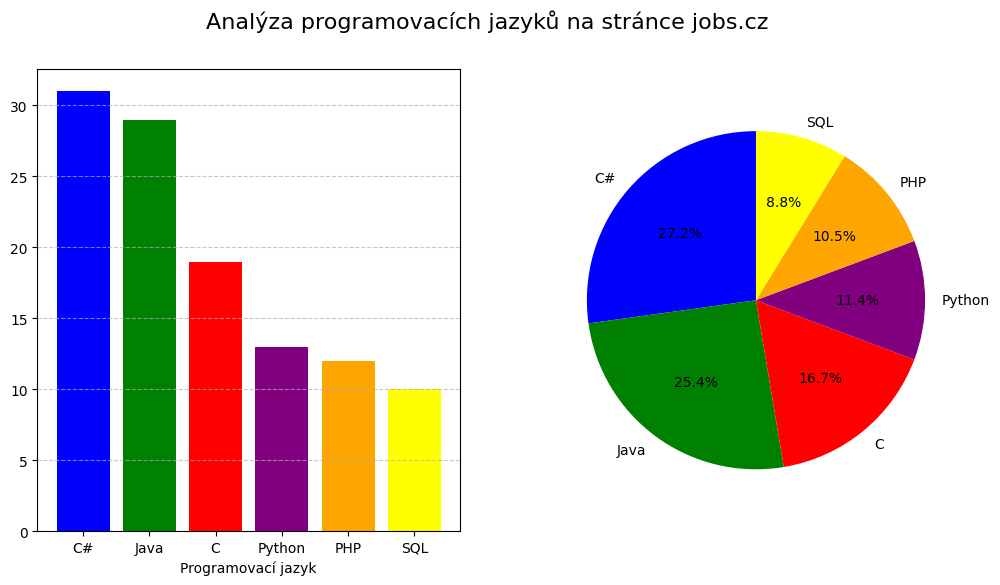

In [4]:
url = 'https://www.jobs.cz/prace/programator/'
target_strings = ["C#", "Python", "C++", "Java ", "C+ ", "Ruby", "SQL", "Visual Basic", "VBA", "PHP", "JavaScript", " C ", " R ", ".NET", "C+,", "Java/"]

#find_strings_on_page(url, target_strings)
data = priprav_data()
graf = vykresli_graf(data)